In [434]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import init_printing
import scipy as spy
from scipy import stats
init_printing()
%matplotlib inline

# Capacidad Calorífica

## Toma de mediciones 

* Plomo = 184.4 g
* Hierro = 56.5 g
* Aluminio = 15.9 
* Bronce = 34.5 g 

Para el experimento se utiliza una masa de agua en el vaso de aluminio de $m_{\text{vaso}} = 100$ ml y con una temperatura en el punto de ebullición de $T =93.5 C^{o}$ 

In [4]:
Pf = np.array([26.0,26.4,33.8,41.1,46.3]); Po = np.array([22.7,22.4,30.4,38.4,43.6])
Hif = np.array([25.9,26.5,36.7,43.5,48.8]); Hio = np.array([22.6,22.2,33.3,40.9,46.0])
Alf = np.array([24.8,28.7,38.1,41.4,49.0]); Alo = np.array([22.5,26.5,36.4,42.6,47.9])
Brf = np.array([25.0,30.6,39.5,45.5,49.7]); Bro = np.array([22.4,28.6,37.8,44.0,48.5])

ma = 100.; Tcal = 93.5; ca = 4.1813#Jg-1K-1
Cc = 0.;

mP = 184.4; mHi= 56.5;mAl=15.9;mBr=34.5; Mc =0.

print "***** Plomo"
print np.mean(Pf),'  ',np.std(Pf)
print np.mean(Po),'  ',np.std(Po)
print "***** Hierro"
print np.mean(Hif),'  ',np.std(Hif)
print np.mean(Hio),'  ',np.std(Hio)
print"***** Aluminio"
print np.mean(Alf),'  ',np.std(Alf)
print np.mean(Alo),'  ',np.std(Alo)
print "***** Bronce"
print np.mean(Brf),'  ',np.std(Brf)
print np.mean(Bro),'  ',np.std(Bro)


***** Plomo
34.72    8.01134196
31.5    8.43184440084
***** Hierro
36.28    9.08237854309
33.0    9.55300999685
***** Aluminio
36.4    8.72353139503
35.18    9.53381350772
***** Bronce
38.06    9.15567583524
36.26    9.62155912521


In [5]:
np.mean(Brf-Bro),np.std(Brf-Bro)

Luego se utiliza la siguiente ecuación para calcular la capacidad calorífica 

$$c_{m} = \frac{(m_{a}c_{a}+M_{c}C_{c})(T_{\text{final}}-T_{\text{fria}})}{m_{m}(T_{\text{cal}}-T_{\text{final}})}$$

En donde

$c_{m}$ :Calor específico muestra.

$c_{a}$ :Calor específico agua.

$C_{c}$ :Calorímetro.

$T_{\text{fría}}$ :Temperatura inicial del agua.

$T_{\text{cal}}$ :Temperatura inicial de la muestra.

$T_{\text{final}}$ :Temperatura de equilibrio del sistema(Agua muestra y calorímetro).

$m_{a}$ :Masa de agua en el inerior del calorimento

$M_{c}$ :Masa del vaso en el interior del calorímetro

$m_{m}$ :Masa de la muestra



Se calcula $c_{m}$ con la ecuación presentada anteriormente


In [6]:
def cm(mm,Tf,Ti):
    ma = 100.;ca = 4.1813#Jg-1K-1
    Mc =0.;Cc = 0.;
    Tcal = 93.5 #C
    return ((ma*ca+Mc*Cc)*(Tf-Ti))/((mm)*(Tcal-Tf))


    

### Capacidad calorífica para el Plomo

In [7]:
np.mean(cm(mP,Pf,Po)),np.std(cm(mP,Pf,Po))

### Capacidad calorífica para el Hierro

In [8]:
np.mean(cm(mHi,Hif,Hio)),np.std(cm(mHi,Hif,Hio))

### Capacidad calorífica para el Aluminio

In [9]:
np.mean(cm(mAl,Alf,Alo)),np.std(cm(mAl,Alf,Alo))

### Capacidad calorífica para el Bronce

In [10]:
np.mean(cm(mBr,Brf,Bro)),np.std(cm(mBr,Brf,Bro))

# Bajas temperaturas

Las masas que se utilizaron para esta parte fueron 

+ Hierro $(60.3\pm0.1)$
+ Cobre $(33.8\pm0.1)$
+ Aluminio $(15.7\pm0.1)$
+ Bronce $(28.1\pm0.1)$

Ahora los datos son los siguientes

In [417]:
t = np.arange(90.,877.,3)
m = np.array([470.9,470.7,470.5,470.3,470.,468.8,469.5,469.3,469.2,468.9,468.7,468.4,468.1,468.,467.7,467.5,467.2,
              467.,466.8,466.6,466.3,466.1,465.9,465.6,465.4,465.2,469.8,464.7,461.9,405.1,462.8,461.2,459.1,458.6,
              457.5,456.4,455.4,454.4,453.6,452.6,451.8,450.8,450.1,449.2,448.3,447.8,446.9,445.9,445.3,444.5,443.9,
              443.,442.2,441.4,440.8,439.8,438.9,436.9,435.2,433.7,433.7,433.2,433.,432.8,432.6,432.4,432.2,432.,431.8,
              431.6,431.4,431.2,431.,430.8,430.6,430.3,430.,429.9,429.7,429.5,429.2,429.0,428.8,428.6,428.3,428.2,427.9,
              427.8,427.6,427.3,427.1,426.8,429.9,392.6,425.9,425.2,424.4,423.6,423.,422.3,421.6,420.9,420.4,419.8,419.2,
              418.8,418.1,417.1,417.2,416.8,415.1,415.8,415.1,414.7,414.2,413.8,413.5,413.1,412.8,412.3,411.8,411.5,411.1,
              410.8,410.9,410.1,409.7,409.3,408.8,406.9,406.2,405.8,405.5,405.2,405.,404.9,404.7,404.4,404.3,404.1,403.9,
              403.9,403.5,403.3,403.1,402.9,402.7,402.5,402.3,402.1,401.9,401.7,401.5,401.3,401.1,400.9,400.8,400.3,400.2,
              400.1,399.9,399.7,399.5,399.3,399.1,398.9,398.7,382.7,382.6,398.8,396.9,395.9,395.2,394.4,393.6,393.,392.2,
              391.6,391.,390.4,389.9,389.2,388.8,388.2,387.7,387.2,386.6,386.2,385.7,385.1,384.5,383.9,382.9,382.8,382.5, 
              382.4,382.2,381.9,381.8,381.6,381.4,381.3,381.1,380.9,380.7,380.5,380.3,380.1,379.9,379.7,379.5,379.4,379.2,
              379.,378.8,378.6,378.4,378.1,378.,377.8,377.6,377.5,377.3,377.1,376.9,376.7,376.5,376.3,376.,375.9,375.7,
              375.5,375.3,378.9,370.5,374.7,373.4,372.6,371.9,370.6,370.3,370.1,370.,369.8,369.6,369.4,369.2,369.1,368.8,
              368.7,368.5,368.3,368.1,367.9,367.7,367.6,367.4,367.2,367.,366.8,366.6,366.4,366.2
            ])

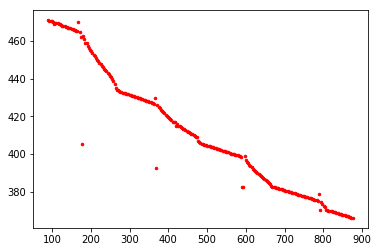

In [197]:

plt.plot(t,m,"r.",markersize=5)

In [160]:
x = [] 
for i in range(len(m)-1):
    if m[i] - m[i+1] > 1.:
        x.append(i+1)
        print i+1

5
27
28
29
31
32
34
35
57
58
59
93
110
129
167
170
234
236
239


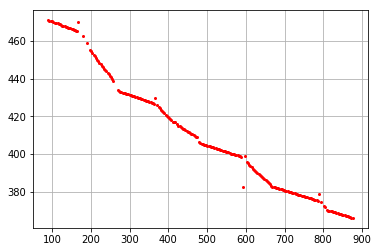

In [161]:
new_m = np.delete(m, x); new_t = np.delete(t, x)
plt.plot(new_t,new_m,"r.",markersize=4)
plt.grid(True)

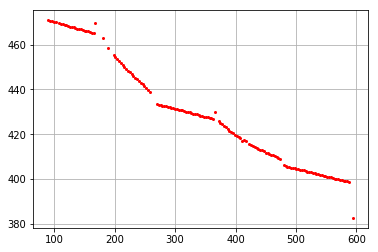

In [162]:
d = 154
plt.plot(new_t[0:d],new_m[0:d],"r.",markersize=4)
plt.grid(True)

In [163]:
eliminar = [26,82,155,218]
Eliminar = [25,81,153,217]

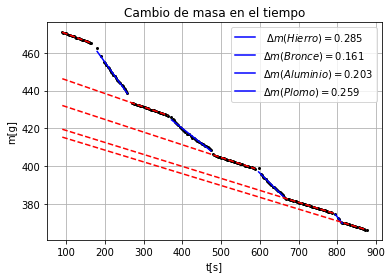

In [463]:
M = np.delete(new_m, Eliminar); T = np.delete(new_t, Eliminar)
plt.plot(T,M,"k.",markersize=4)
plt.grid(True)



slope, intercept, r_value, p_value, std_err = spy.stats.linregress(T[0:25],M[0:25])
polynomial = np.poly1d([slope, intercept])
line = polynomial(T[0:25])
plt.plot(T[0:25], line, 'r--')#, label ="$\Delta m ={0:.4f}$".format(slope)) 

slope1, intercept1, r_value1, p_value1, std_err1 = spy.stats.linregress(T[25:48],M[25:48])
polynomial = np.poly1d([slope1, intercept1])
line = polynomial(T[25:48])
plt.plot(T[25:48], line, 'b-', label =" $\Delta m (Hierro) ={0:.3f}$".format(-slope1)) 

slope2, intercept2, r_value2, p_value2, std_err2 = spy.stats.linregress(T[48:80],M[48:80])
polynomial = np.poly1d([slope2, intercept2])
line = polynomial(T[0:80])
plt.plot(T[0:80], line, 'r--')#, label ="$\Delta m ={0:.4f}$".format(slope2)) 


slope3, intercept3, r_value3, p_value3, std_err3 = spy.stats.linregress(T[80:114],M[80:114])
polynomial = np.poly1d([slope3, intercept3])
line = polynomial(T[80:114])
plt.plot(T[80:114], line, 'b-', label ="$\Delta m (Bronce) ={0:.3f}$".format(-slope3)) 

slope4, intercept4, r_value4, p_value4, std_err4= spy.stats.linregress(T[114:151],M[114:151])
polynomial = np.poly1d([slope4, intercept4])
line = polynomial(T[0:151])
plt.plot(T[0:151], line, 'r--')#, label ="$\Delta m ={0:.4f}$".format(slope4)) 

slope5, intercept5, r_value5, p_value5, std_err5= spy.stats.linregress(T[151:173],M[151:173])
polynomial = np.poly1d([slope5, intercept5])
line = polynomial(T[151:173])
plt.plot(T[151:173], line, 'b-', label ="$\Delta m (Aluminio) ={0:.3f}$".format(-slope5)) 

slope6, intercept6, r_value6, p_value6, std_err6= spy.stats.linregress(T[173:215],M[173:215])
polynomial = np.poly1d([slope6, intercept6])
line = polynomial(T[0:215])
plt.plot(T[0:215], line, 'r--')#, label ="$\Delta m ={0:.4f}$".format(slope6)) 

slope7, intercept7, r_value7, p_value7, std_err7= spy.stats.linregress(T[214:219],M[214:219])
polynomial = np.poly1d([slope7, intercept7])
line = polynomial(T[214:219])
plt.plot(T[214:219], line, 'b-', label ="$\Delta m (Plomo) ={0:.3f}$".format(-slope7)) 

slope8, intercept8, r_value8, p_value8, std_err8= spy.stats.linregress(T[219:500],M[219:500])
polynomial = np.poly1d([slope8, intercept8])
line = polynomial(T[0:500])
plt.plot(T[0:500], line, 'r--')#, label ="$\Delta m ={0:.4f}$".format(slope8)) 




plt.title("Cambio de masa en el tiempo")
plt.xlabel("t[s]")
plt.ylabel("m[g]")
plt.legend()
plt.savefig("Capacidad")

# Hierro

Text(0,0.5,u'm[g]')

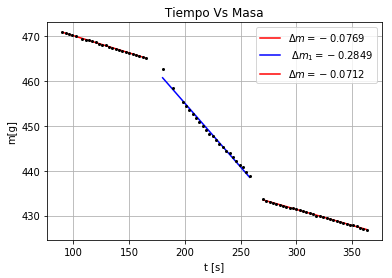

In [235]:

slope, intercept, r_value, p_value, std_err = spy.stats.linregress(T[0:25],M[0:25])
polynomial = np.poly1d([slope, intercept])
line = polynomial(T[0:25])
plt.plot(T[0:25], line, 'r-', label ="$\Delta m ={0:.4f}$".format(slope)) 

slope1, intercept1, r_value1, p_value1, std_err1 = spy.stats.linregress(T[25:48],M[25:48])
polynomial = np.poly1d([slope1, intercept1])
line = polynomial(T[25:48])
plt.plot(T[25:48], line, 'b-', label =" $\Delta m_1 ={0:.4f}$".format(slope1)) 

slope2, intercept2, r_value2, p_value2, std_err2 = spy.stats.linregress(T[48:80],M[48:80])
polynomial = np.poly1d([slope2, intercept2])
line = polynomial(T[48:80])
plt.plot(T[48:80], line, 'r-', label ="$\Delta m ={0:.4f}$".format(slope2)) 



d1 = 80
plt.plot(T[0:d1],M[0:d1],"k.",markersize=4)
plt.grid(True)
plt.legend()
plt.title(" Tiempo Vs Masa ")
plt.xlabel("t [s]")
plt.ylabel("m[g]")

# Cobre 


Text(0,0.5,u'm[g]')

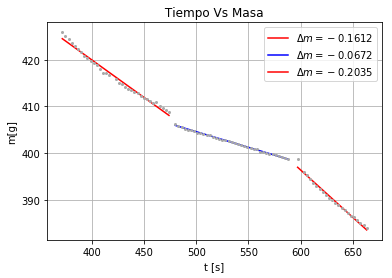

In [270]:
slope2, intercept2, r_value2, p_value2, std_err2 = spy.stats.linregress(T[48:80],M[48:80])
polynomial = np.poly1d([slope2, intercept2])
line = polynomial(T[48:80])
plt.plot(T[48:80], line, 'r-', label ="$\Delta m ={0:.4f}$".format(slope2)) 

slope3, intercept3, r_value3, p_value3, std_err3 = spy.stats.linregress(T[80:114],M[80:114])
polynomial = np.poly1d([slope3, intercept3])
line = polynomial(T[80:114])
plt.plot(T[80:114], line, 'b-', label ="$\Delta m ={0:.4f}$".format(slope3)) 

slope4, intercept4, r_value4, p_value4, std_err4= spy.stats.linregress(T[114:151],M[114:151])
polynomial = np.poly1d([slope4, intercept4])
line = polynomial(T[114:151])
plt.plot(T[114:151], line, 'r-', label ="$\Delta m ={0:.4f}$".format(slope4)) 






d2 = 80; d3 = 173
plt.plot(T[d2:d3],M[d2:d3],"g.",color = "darkgrey",markersize=4)
plt.grid(True)
plt.legend()
plt.title(" Tiempo Vs Masa ")
plt.xlabel("t [s]")
plt.ylabel("m[g]")

# Aluminio

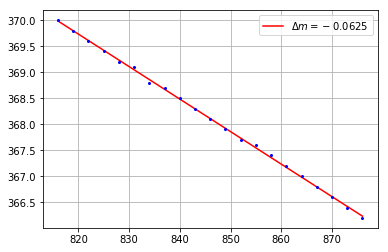

In [314]:
slope8, intercept8, r_value8, p_value8, std_err8= spy.stats.linregress(T[219:500],M[219:500])
polynomial = np.poly1d([slope8, intercept8])
line = polynomial(T[219:500])
plt.plot(T[219:500], line, 'r-', label ="$\Delta m ={0:.4f}$".format(slope8)) 

d4 = 219; d5 = 500
plt.plot(T[d4:d5],M[d4:d5],"b.",markersize=4)
plt.grid(True)
plt.legend()

Medida de la capacdad calorifica a través de la fórmula 

$$C_{v} = \frac{L \Delta m}{m \Delta T}$$

Donde 

+ $L \simeq 200 J/g$ 
+ $\Delta T  = (T_{o} - T_{f}) = (18 + 195.8)C^{o} = 213.8C^{o}$

In [435]:
def Cap_calorifica(m,Dm):
    L = 200# J/g; 
    dT = (-15-195.8)/274.15 # C
    return (L*Dm)/(m*dT)
mHi = 60.3; mBr = 33.8; mAl = 15.7; mPl = 28.1 
DmHi = slope1 ;DmBr = slope3;DmAl = slope5;DmPl = slope7

def Error_linealizacion(x,y):
    yp = np.mean(y)*np.ones(len(y))
    ei2 = np.sum((y-yp)**2)
    ey = np.sqrt(ei2/(len(y)-2))
    xi2 = np.sum(x**2); Xi2 = np.sum(x)**2
    db = ey*np.sqrt((len(y))/((len(y)*xi2)-Xi2)) #pendiente
    da = ey*np.sqrt((xi2)/(len(y)*xi2-Xi2)) #punto de corte
    return np.array([da,db])

In [437]:
print "Hierro" ,Cap_calorifica(mHi,DmHi),"Error", Error_linealizacion(T[25:48],M[25:48])[1]
print "Bronce" ,Cap_calorifica(mBr,DmBr),"Error", Error_linealizacion(T[80:114],M[80:114])[1]
print "Aluminio" ,Cap_calorifica(mAl,DmAl),"Error", Error_linealizacion(T[151:173],M[151:173])[1]
print "Plomo" ,Cap_calorifica(mPl,DmPl),"Error", Error_linealizacion(T[214:219],M[214:219])[1]



Hierro 1.22897015353 Error 0.062427379253
Bronce 1.2408054815 Error 0.0287109895602
Aluminio 3.37074647522 Error 0.0458615041869
Plomo 2.39799865552 Error 0.151492466847


# Temperatura de Debye

$$C_{v} = \frac{12\pi^{4}Nk_{B}}{5T_{D}
{3}}T^{3}$$

## Incertidumbre Debye

$$\Delta T_{D} = \frac{\partial T_{D}}{\partial C_{V} }\Delta C_{v} = -\frac{(2/3)^{2/3} \pi^{4/3} (Nk_{B}/C)^{1/3} T}{5^{1/3}C_{v}}\Delta C_{v} $$


In [456]:
def TD(c):
    R = 8.314472;T = 77
    return T*np.power((12*np.pi**4*R)/(5.*c),1./3.)

def Error_TD(DC,C):
    R = 8.314472;T = 77
    return (((np.power(2/3,2/3)*np.power(np.pi,4/3)*np.power(8/C,1/3))*T)/(np.power(5.,1/3)*C))*DC


In [457]:
Error_TD(Error_linealizacion(T[25:48],M[25:48])[1],Cap_calorifica(mHi,DmHi))

In [460]:
print "Temperatura Debye Hierro", TD(Cap_calorifica(mHi,DmHi)), "Error",Error_TD(Error_linealizacion(T[25:48],M[25:48])[1],Cap_calorifica(mHi,DmHi))
print "Temperatura Debye Bronce", TD(Cap_calorifica(mBr,DmBr)), "Error",Error_TD(Error_linealizacion(T[80:114],M[80:114])[1],Cap_calorifica(mBr,DmBr))
print "Temperatura Debye Aluminio", TD(Cap_calorifica(mAl,DmAl)), "Error",Error_TD(Error_linealizacion(T[151:173],M[151:173])[1],Cap_calorifica(mAl,DmAl))
print "Temperatura Debye Plomo", TD(Cap_calorifica(mPl,DmPl)), "Error",Error_TD(Error_linealizacion(T[214:219],M[214:219])[1],Cap_calorifica(mPl,DmPl))

Temperatura Debye Hierro 897.136960211 Error 14.9964926547
Temperatura Debye Bronce 894.275418595 Error 6.80946408578
Temperatura Debye Aluminio 640.910172419 Error 2.86956821389
Temperatura Debye Plomo 717.942312013 Error 14.9254981214


In [395]:
TD = np.array([TD(Cap_calorifica(mHi,DmHi)),TD(Cap_calorifica(mBr,DmBr)),TD(Cap_calorifica(mAl,DmAl)),TD(Cap_calorifica(mPl,DmPl))])
CV = np.array([Cap_calorifica(mHi,DmHi),Cap_calorifica(mBr,DmBr),Cap_calorifica(mAl,DmAl),Cap_calorifica(mPl,DmPl)])

-0.00792460313737


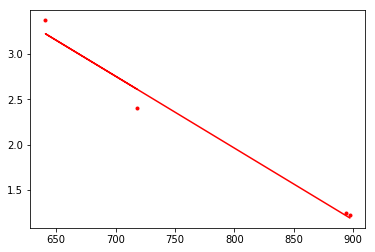

In [399]:
plt.plot(TD,CV,"r.")
slopef, interceptf, r_valuef, p_valuef, std_errf = spy.stats.linregress(TD,CV)
polynomial = np.poly1d([slopef, interceptf])
line = polynomial(TD)
plt.plot(TD, line, 'r-', label ="$\Delta m ={0:.4f}$".format(slope2)) 
print slopef

0.01


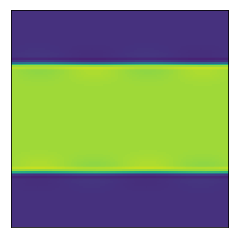

0.02


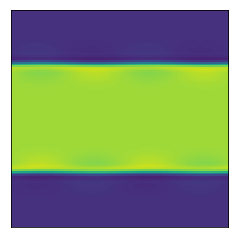

0.03


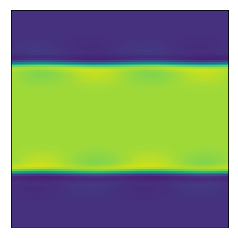

0.04


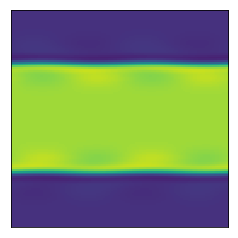

0.05


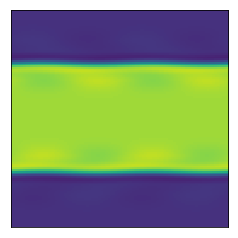

0.06


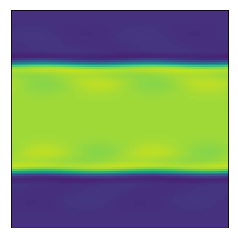

0.07


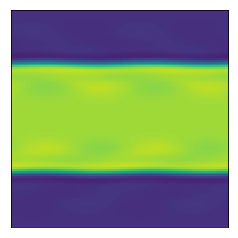

0.08


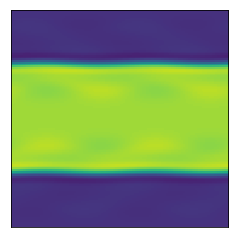

0.09


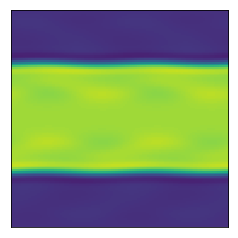

0.1


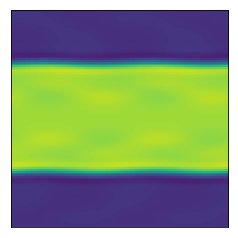

0.11


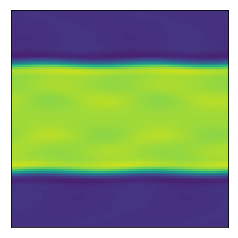

0.12


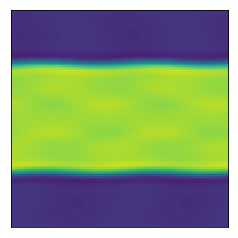

0.13


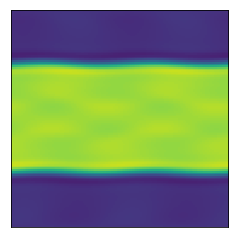

0.14


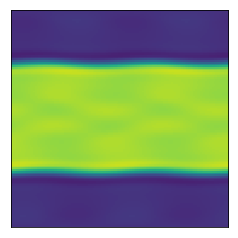

0.15


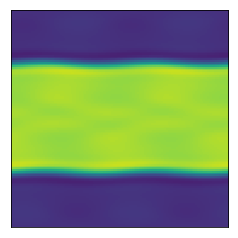

0.16


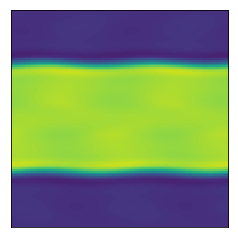

0.17


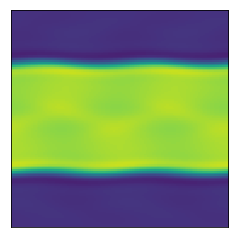

0.18


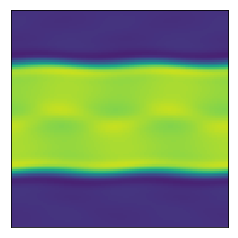

0.19


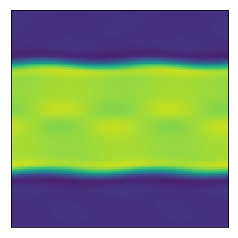

0.2


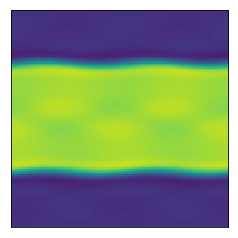

0.21


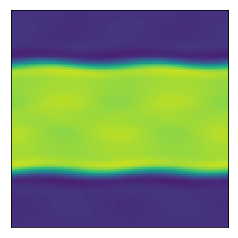

0.22


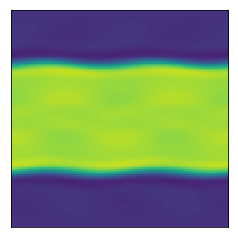

0.23


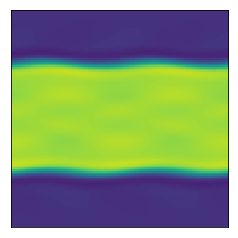

0.24


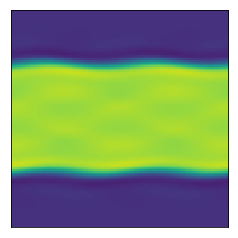

0.25


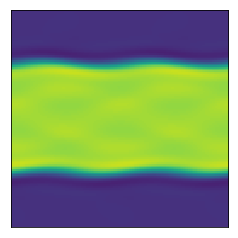

0.26


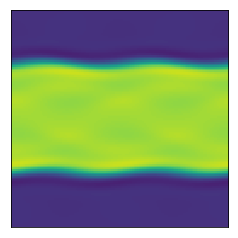

0.27


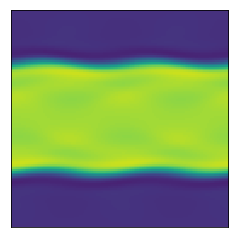

0.28


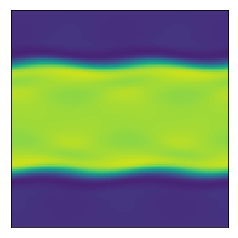

0.29


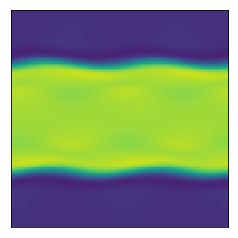

0.3


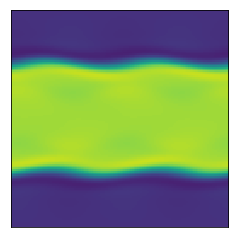

0.31


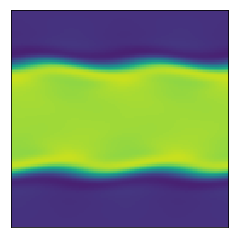

0.32


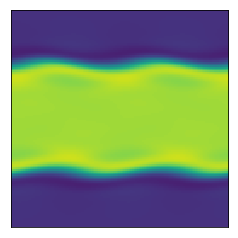

0.33


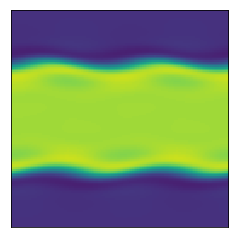

0.34


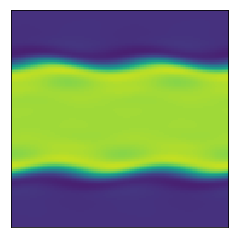

0.35


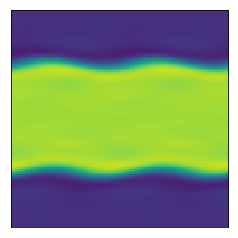

0.36


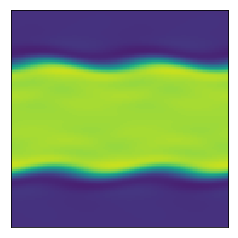

0.37


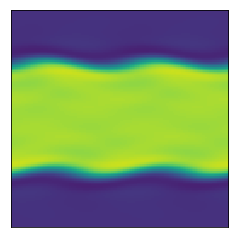

0.38


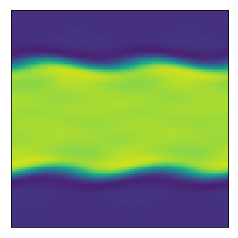

0.39


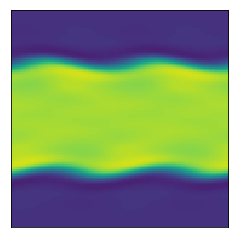

0.4


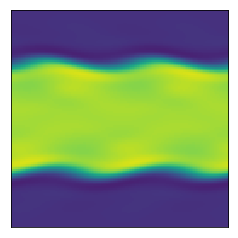

0.41


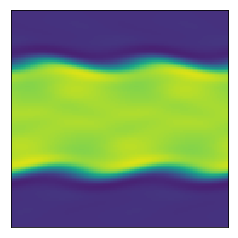

0.42


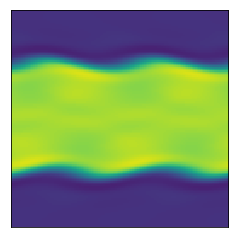

0.43


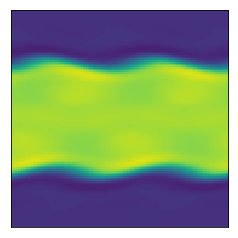

0.44


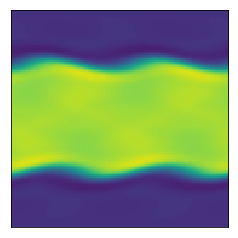

0.45


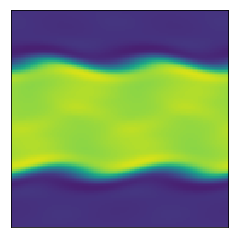

0.46


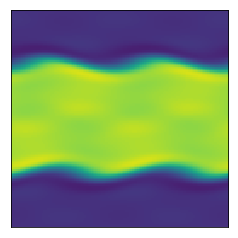

0.47


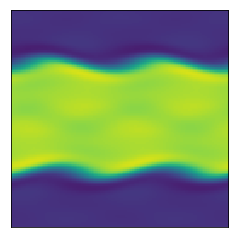

0.48


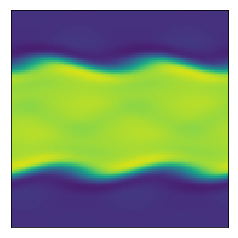

0.49


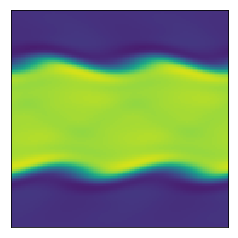

0.5


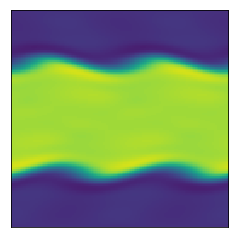

0.51


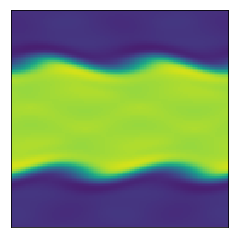

0.52


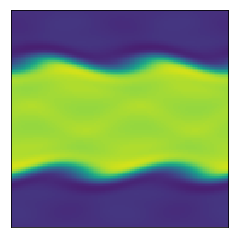

0.53


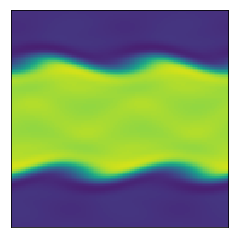

0.54


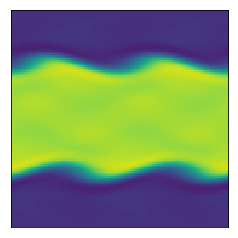

0.55


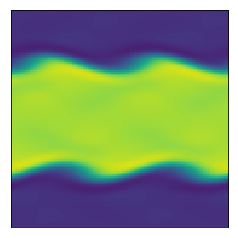

0.56


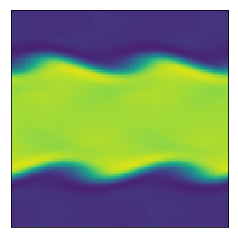

0.57


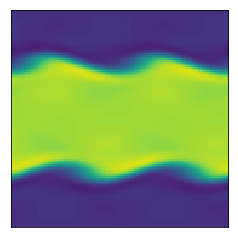

0.58


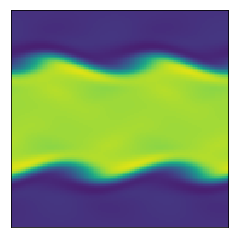

0.59


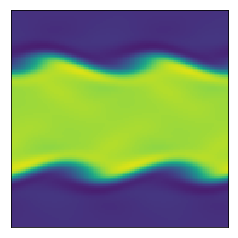

0.6


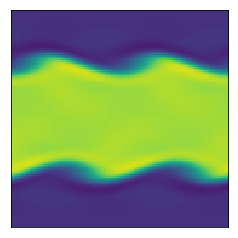

0.61


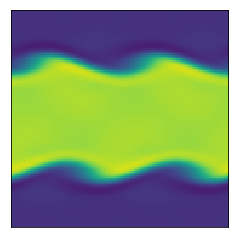

0.62


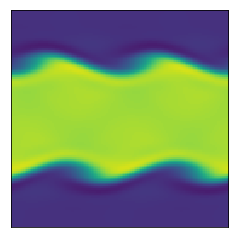

0.63


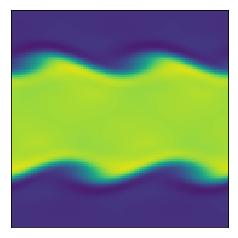

0.64


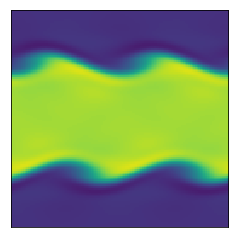

0.65


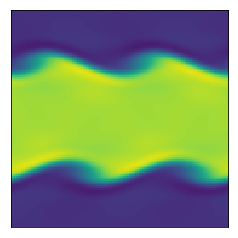

0.66


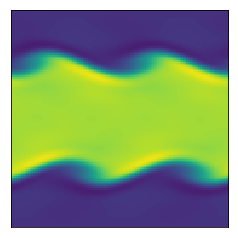

0.67


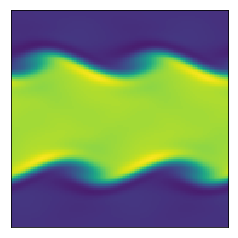

0.68


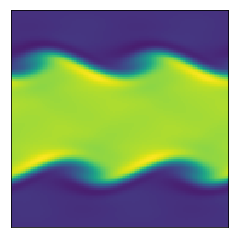

0.69


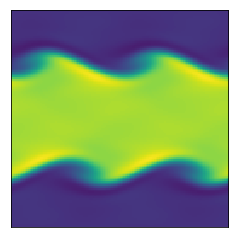

0.7


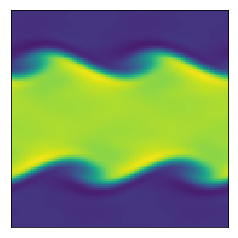

0.71


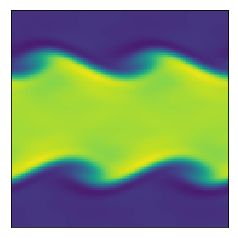

0.72


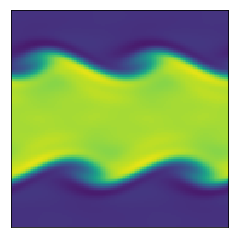

0.73


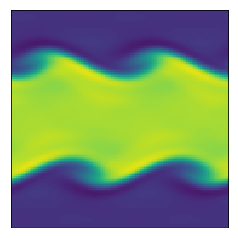

0.74


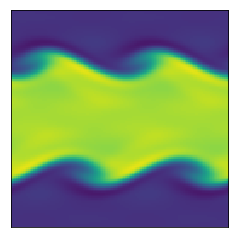

0.75


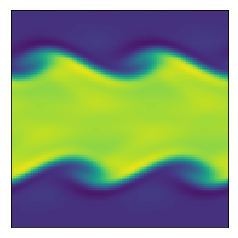

0.76


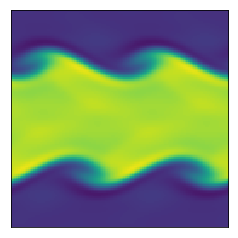

0.77


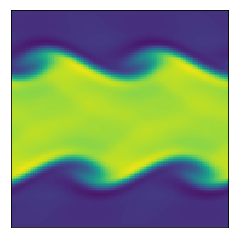

0.78


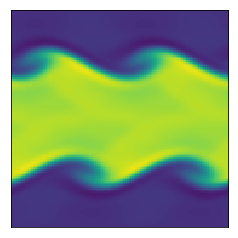

0.79


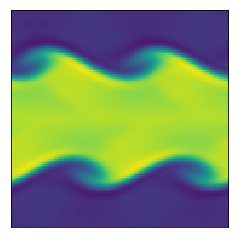

0.8


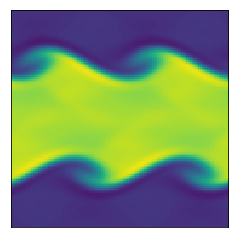

0.81


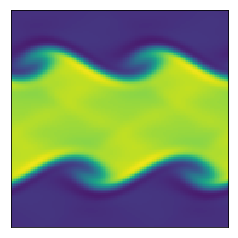

0.82


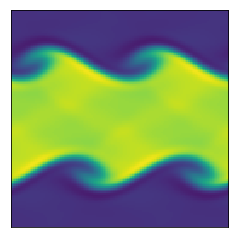

0.83


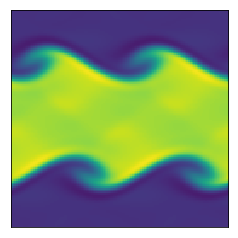

0.84


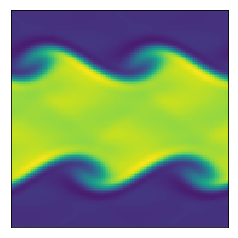

0.85


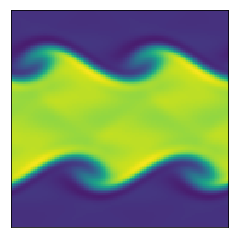

0.86


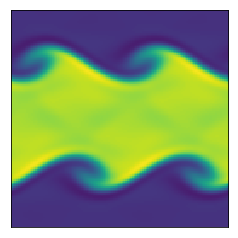

0.87


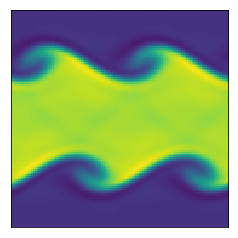

0.88


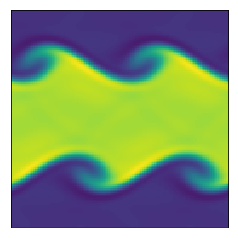

0.89


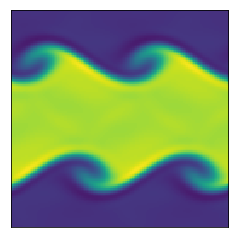

0.9


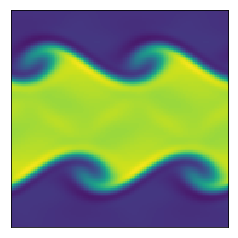

0.91


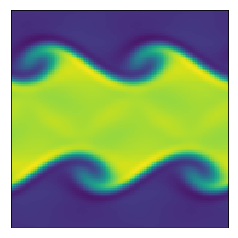

0.92


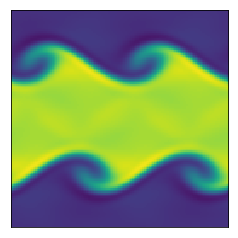

0.93


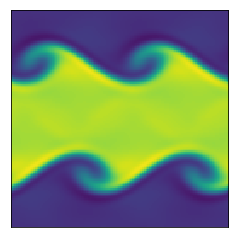

0.94


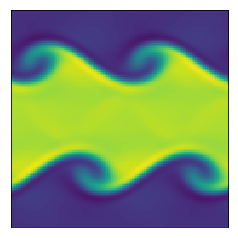

0.95


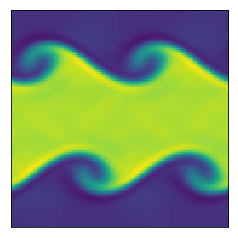

0.96


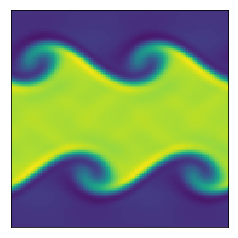

0.97


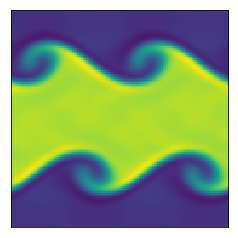

0.98


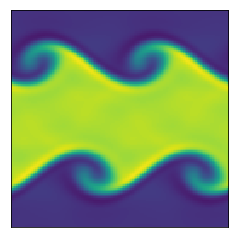

0.99


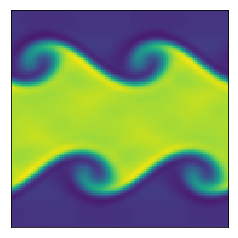

1.0


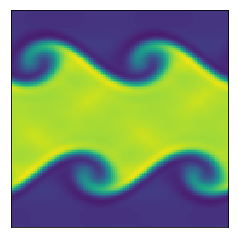

1.01


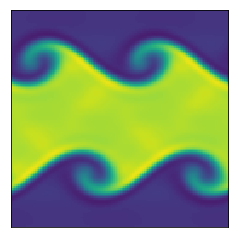

1.02


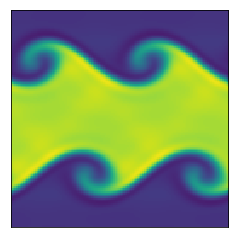

1.03


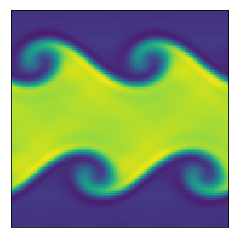

1.04


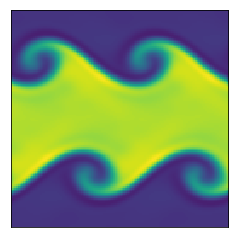

1.05


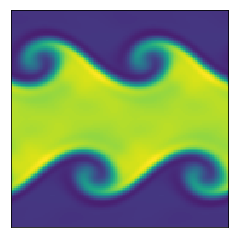

1.06


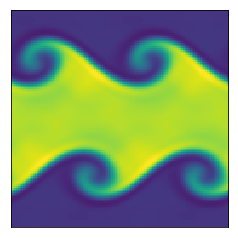

1.07


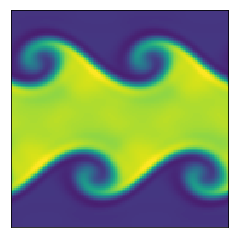

1.08


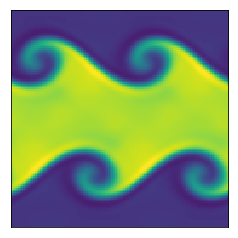

1.09


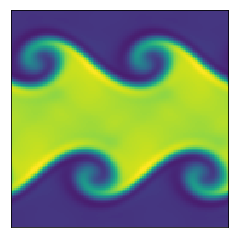

1.1


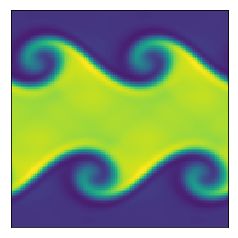

1.11


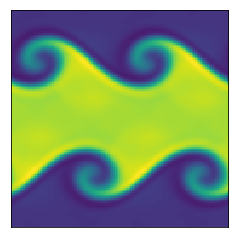

1.12


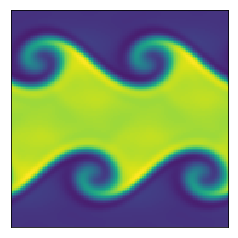

1.13


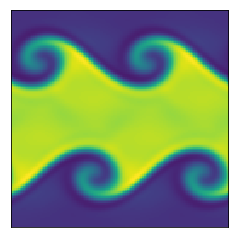

1.14


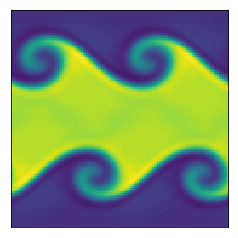

1.15


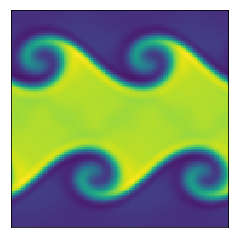

1.16


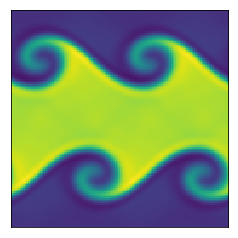

1.17


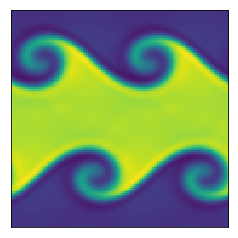

1.18


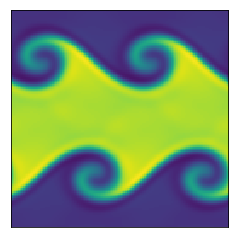

1.19


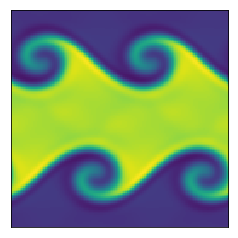

1.2


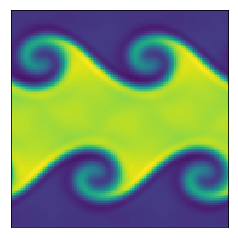

1.21


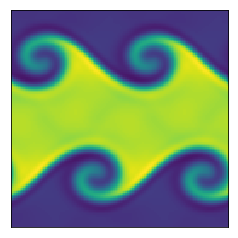

1.22


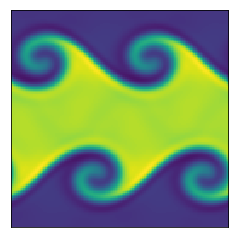

1.23


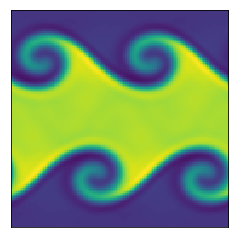

1.24


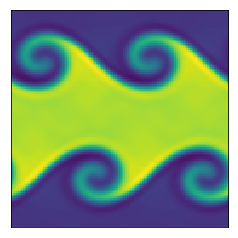

1.25


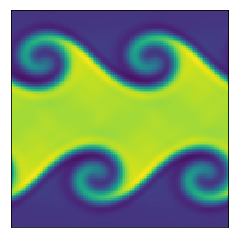

1.26


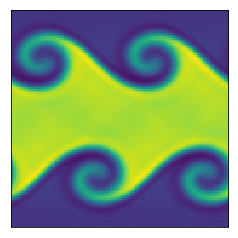

1.27


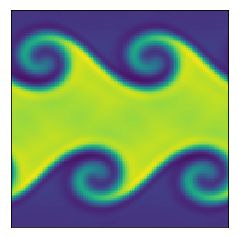

1.28


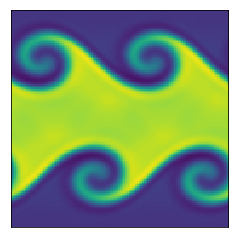

1.29


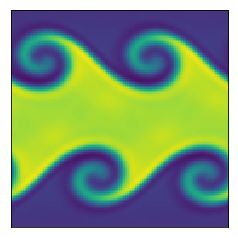

1.3


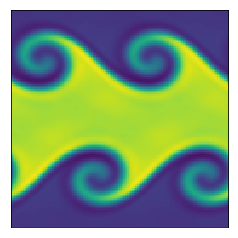

1.31


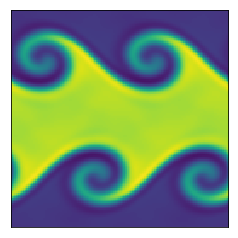

1.32


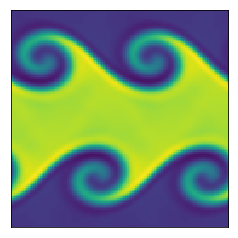

1.33


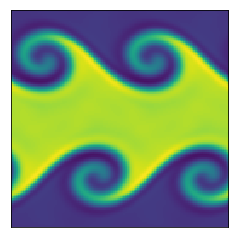

1.34


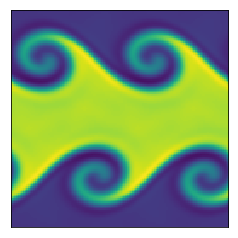

1.35


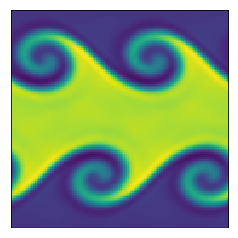

1.36


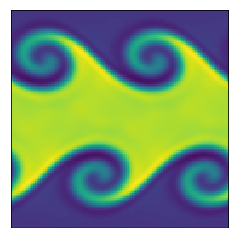

1.37


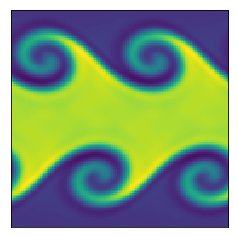

1.38


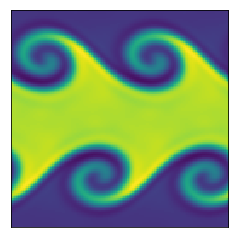

1.39


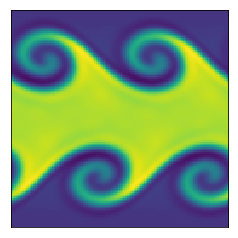

1.4


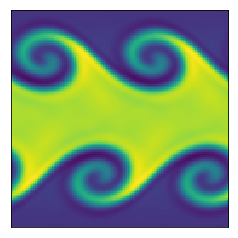

1.41


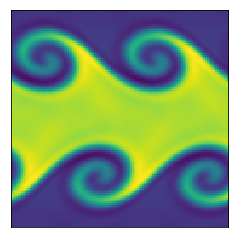

1.42


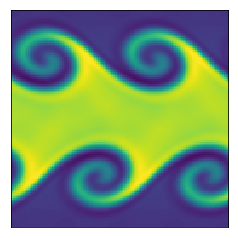

1.43


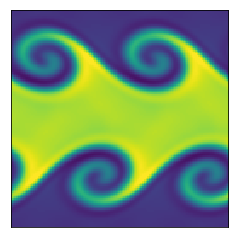

1.44


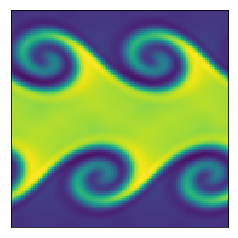

1.45


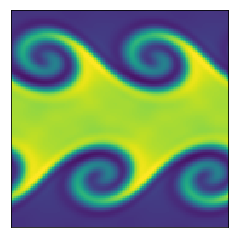

1.46


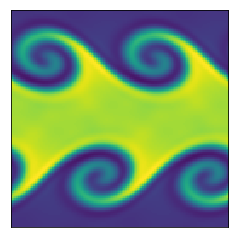

1.47


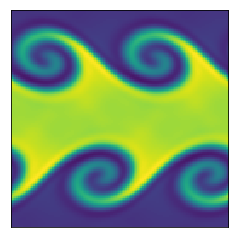

1.48


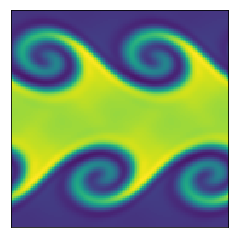

1.49


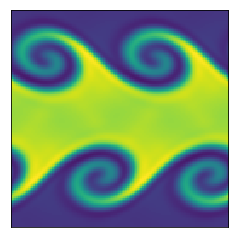

1.5


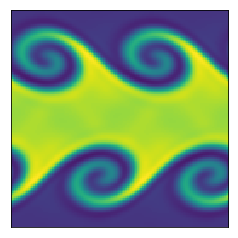

1.51


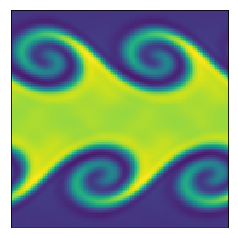

1.52


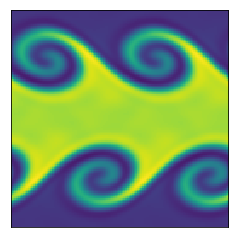

1.53


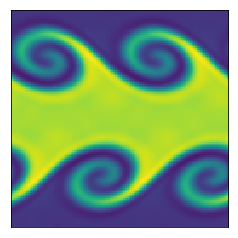

1.54


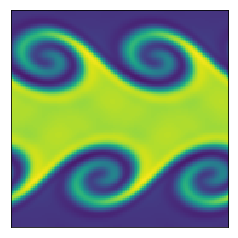

1.55


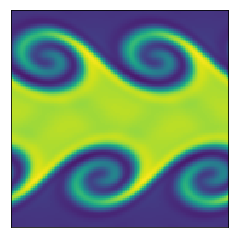

1.56


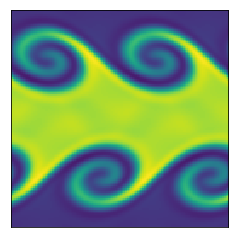

1.57


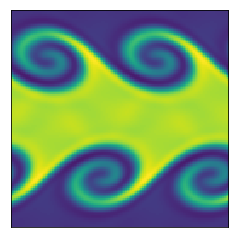

1.58


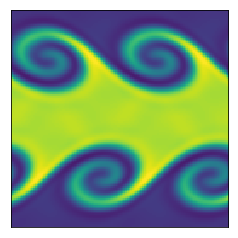

1.59


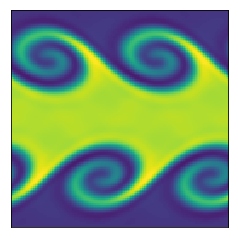

1.6


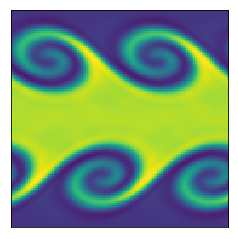

1.61


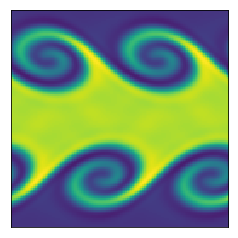

1.62


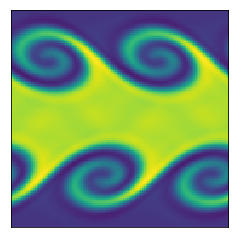

1.63


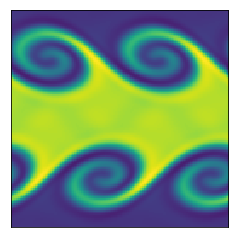

1.64


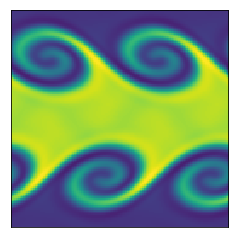

1.65


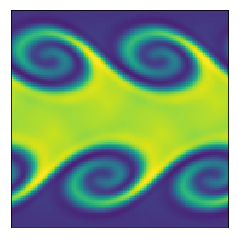

1.66


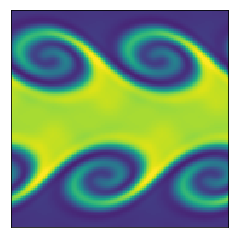

1.67


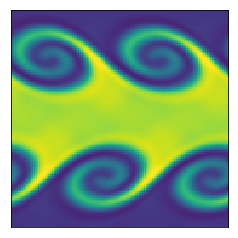

1.68


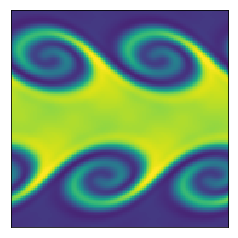

1.69


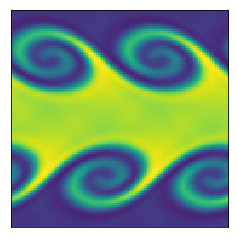

1.7


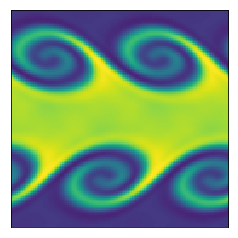

1.71


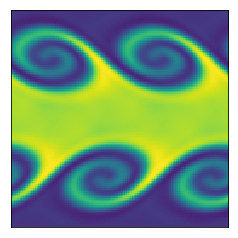

1.72


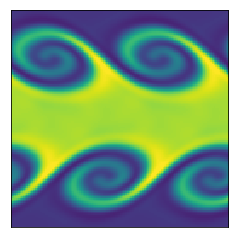

1.73


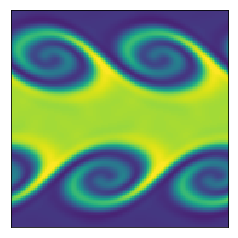

1.74


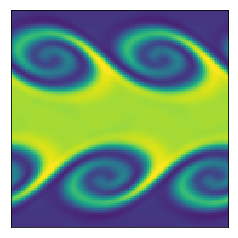

1.75


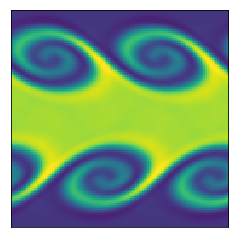

1.76


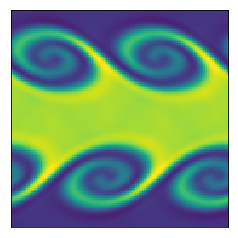

1.77


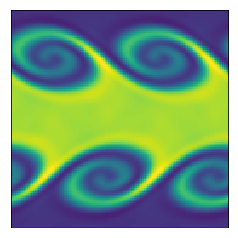

1.78


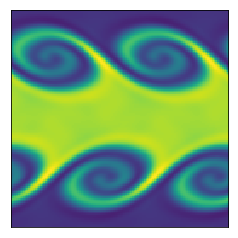

1.79


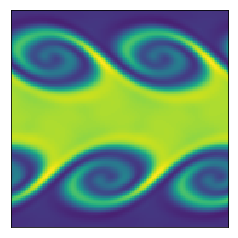

1.8


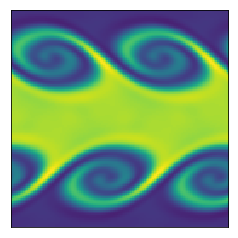

1.81


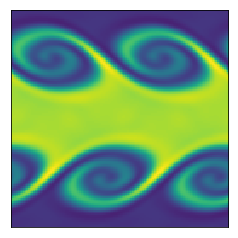

1.82


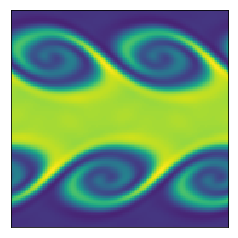

1.83


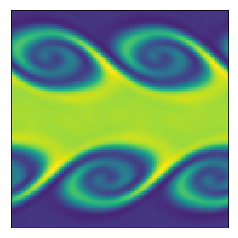

1.84


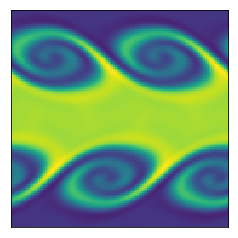

1.85


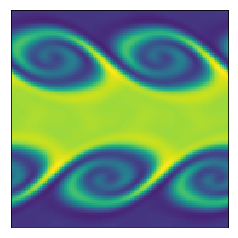

1.86


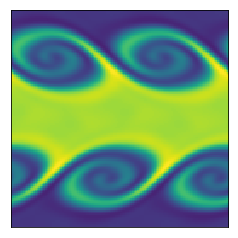

1.87


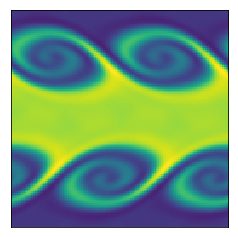

1.88


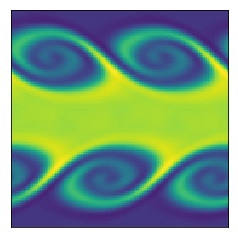

1.89


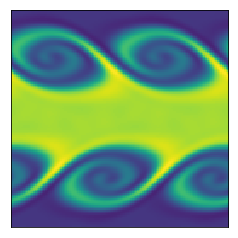

1.9


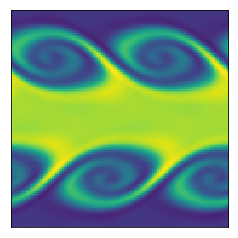

1.91


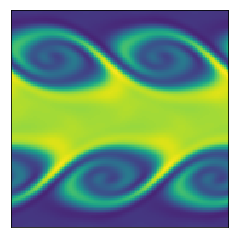

1.92


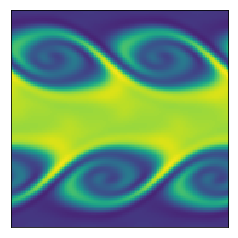

1.93


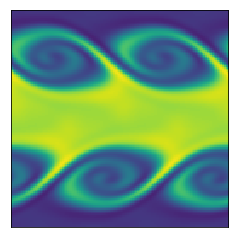

1.94


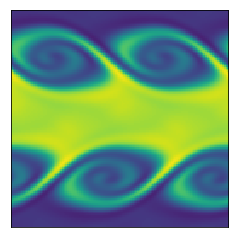

1.95


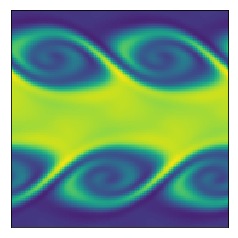

1.96


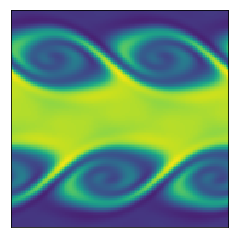

1.97


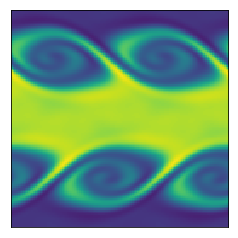

1.98


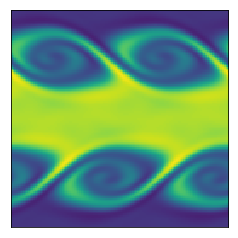

1.99


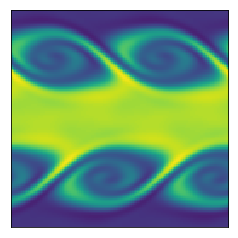

2.0


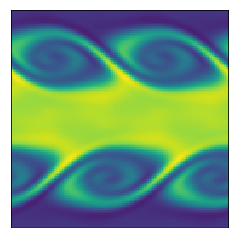

In [22]:
#  Compressible Fluid Dynamics - Finite volume
#  Philip Mocz (2016)   pmocz@cfa.harvard.edu
#  Kelvin Helmholtz Instability (KHI)

import matplotlib.pyplot as plt
import numpy as np

# Parameters
Nx = 128
Ny = 128
boxSizeX = 1.
boxSizeY = 1.
dx = boxSizeX / Nx
dy = boxSizeY / Ny
vol = dx*dy
Y, X = np.meshgrid( np.linspace(0.5*dy, boxSizeY-0.5*dy, Ny), np.linspace(0.5*dx, boxSizeX-0.5*dx, Nx) )
courant_fac = 0.4
t = 0
tEnd = 2
tOut = 0.01
useSlopeLimiting = False

# Set initial conditions for KHI
w0 = 0.1
sigma = 0.05/np.sqrt(2.)
gamma = 5/3.
rho = 1. + (np.abs(Y-0.5) < 0.25)
vx = -0.5 + (np.abs(Y-0.5)<0.25)
vy = w0*np.sin(4*np.pi*X) * ( np.exp(-(Y-0.25)**2/(2 * sigma**2)) + np.exp(-(Y-0.75)**2/(2*sigma**2)) )
vz = 0*X
P = 0*X + 2.5

# directions for np.roll() 
R = -1   # right
L = 1    # left

# quick plotting function 
def myPlot():
  plt.clf()
  plt.imshow(rho.T)
  plt.clim(0.8, 2.2)
  ax = plt.gca()
  ax.invert_yaxis()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  plt.draw()
 
myPlot()
outputCount = 1

# get conserved variables
Mass = rho * vol
Momx = rho * vx * vol
Momy = rho * vy * vol
Energy = (P/(gamma-1) + 0.5*rho*(vx**2+vy**2))*vol

# Main loop
while (t < tEnd):
  # get primitive variables
  rho = Mass / vol
  vx = Momx / rho / vol
  vy = Momy / rho / vol
  P = (Energy/vol - 0.5*rho * (vx**2+vy**2)) * (gamma-1)
  
  # get time step (CFL)
  dt = courant_fac * np.min( np.min([dx,dy]) / (np.sqrt( gamma*P/rho ) + np.sqrt(vx**2+vy**2)) )
  plotThisTurn = False
  if t + dt > outputCount*tOut:
    dt = outputCount*tOut - t
    plotThisTurn = True
    
  # calculate gradients
  rho_gradx = ( np.roll(rho,R,axis=0) - np.roll(rho,L,axis=0) ) / (2.*dx)
  rho_grady = ( np.roll(rho,R,axis=1) - np.roll(rho,L,axis=1) ) / (2.*dy)
  vx_gradx  = ( np.roll(vx,R,axis=0) - np.roll(vx,L,axis=0) ) / (2.*dx)
  vx_grady  = ( np.roll(vx,R,axis=1) - np.roll(vx,L,axis=1) ) / (2.*dy)
  vy_gradx  = ( np.roll(vy,R,axis=0) - np.roll(vy,L,axis=0) ) / (2.*dx)
  vy_grady  = ( np.roll(vy,R,axis=1) - np.roll(vy,L,axis=1) ) / (2.*dy)
  P_gradx   = ( np.roll(P,R,axis=0) - np.roll(P,L,axis=0) ) / (2.*dx)
  P_grady   = ( np.roll(P,R,axis=1) - np.roll(P,L,axis=1) ) / (2.*dy)
  
  # slope limit gradients
  if useSlopeLimiting:
    rho_gradx = np.maximum(0., np.minimum(1., ( (rho-np.roll(rho,L,axis=0))/dx)/(rho_gradx + 1.0e-8*(rho_gradx==0)))) * rho_gradx
    rho_gradx = np.maximum(0., np.minimum(1., (-(rho-np.roll(rho,R,axis=0))/dx)/(rho_gradx + 1.0e-8*(rho_gradx==0)))) * rho_gradx
    rho_grady = np.maximum(0., np.minimum(1., ( (rho-np.roll(rho,L,axis=1))/dy)/(rho_grady + 1.0e-8*(rho_grady==0)))) * rho_grady
    rho_grady = np.maximum(0., np.minimum(1., (-(rho-np.roll(rho,R,axis=1))/dy)/(rho_grady + 1.0e-8*(rho_grady==0)))) * rho_grady
    vx_gradx  = np.maximum(0., np.minimum(1., ( (vx-np.roll(vx,L,axis=0))/dx)  /(vx_gradx  + 1.0e-8*(vx_gradx ==0)))) * vx_gradx
    vx_gradx  = np.maximum(0., np.minimum(1., (-(vx-np.roll(vx,R,axis=0))/dx)  /(vx_gradx  + 1.0e-8*(vx_gradx ==0)))) * vx_gradx
    vx_grady  = np.maximum(0., np.minimum(1., ( (vx-np.roll(vx,L,axis=1))/dy)  /(vx_grady  + 1.0e-8*(vx_grady ==0)))) * vx_grady
    vx_grady  = np.maximum(0., np.minimum(1., (-(vx-np.roll(vx,R,axis=1))/dy)  /(vx_grady  + 1.0e-8*(vx_grady ==0)))) * vx_grady
    vy_gradx  = np.maximum(0., np.minimum(1., ( (vy-np.roll(vy,L,axis=0))/dx)  /(vy_gradx  + 1.0e-8*(vy_gradx ==0)))) * vy_gradx
    vy_gradx  = np.maximum(0., np.minimum(1., (-(vy-np.roll(vy,R,axis=0))/dx)  /(vy_gradx  + 1.0e-8*(vy_gradx ==0)))) * vy_gradx
    vy_grady  = np.maximum(0., np.minimum(1., ( (vy-np.roll(vy,L,axis=1))/dy)  /(vy_grady  + 1.0e-8*(vy_grady ==0)))) * vy_grady
    vy_grady  = np.maximum(0., np.minimum(1., (-(vy-np.roll(vy,R,axis=1))/dy)  /(vy_grady  + 1.0e-8*(vy_grady ==0)))) * vy_grady
    P_gradx   = np.maximum(0., np.minimum(1., ( (P-np.roll(P,L,axis=0))/dx)    /(P_gradx   + 1.0e-8*(P_gradx  ==0)))) * P_gradx
    P_gradx   = np.maximum(0., np.minimum(1., (-(P-np.roll(P,R,axis=0))/dx)    /(P_gradx   + 1.0e-8*(P_gradx  ==0)))) * P_gradx
    P_grady   = np.maximum(0., np.minimum(1., ( (P-np.roll(P,L,axis=1))/dy)    /(P_grady   + 1.0e-8*(P_grady  ==0)))) * P_grady
    P_grady   = np.maximum(0., np.minimum(1., (-(P-np.roll(P,R,axis=1))/dy)    /(P_grady   + 1.0e-8*(P_grady  ==0)))) * P_grady

  # extrapolate to cell faces (in time & space)
  rho_prime = rho - 0.5*dt *( vx * rho_gradx + rho * vx_gradx + vy * rho_grady + rho * vy_grady)
  rho_XL = rho_prime - rho_gradx * dx/2.  
  rho_XL = np.roll(rho_XL,R,axis=0)
  rho_XR = rho_prime + rho_gradx * dx/2.
  rho_YL = rho_prime - rho_grady * dy/2.  
  rho_YL = np.roll(rho_YL,R,axis=1)
  rho_YR = rho_prime + rho_grady * dy/2.
  vx_prime = vx - 0.5*dt * ( vx * vx_gradx + vy * vx_grady + (1/rho) * P_gradx )
  vx_XL = vx_prime - vx_gradx * dx/2.  
  vx_XL = np.roll(vx_XL,R,axis=0)
  vx_XR = vx_prime + vx_gradx * dx/2.
  vx_YL = vx_prime - vx_grady * dy/2. 
  vx_YL = np.roll(vx_YL,R,axis=1)
  vx_YR = vx_prime + vx_grady * dy/2.
  vy_prime = vy - 0.5*dt * ( vx * vy_gradx + vy * vy_grady + (1/rho) * P_grady )
  vy_XL = vy_prime - vy_gradx * dx/2.
  vy_XL = np.roll(vy_XL,R,axis=0)
  vy_XR = vy_prime + vy_gradx * dx/2.
  vy_YL = vy_prime - vy_grady * dy/2. 
  vy_YL = np.roll(vy_YL,R,axis=1)
  vy_YR = vy_prime + vy_grady * dy/2.
  P_prime = P - 0.5*dt * ( gamma*P * (vx_gradx + vy_grady)  + vx * P_gradx + vy * P_grady )
  P_XL = P_prime - P_gradx * dx/2.  
  P_XL = np.roll(P_XL,R,axis=0)
  P_XR = P_prime + P_gradx * dx/2.
  P_YL = P_prime - P_grady * dy/2.
  P_YL = np.roll(P_YL,R,axis=1)
  P_YR = P_prime + P_grady * dy/2.

  # compute star (averaged) states
  rho_Xstar = 0.5*(rho_XL + rho_XR)
  rho_Ystar = 0.5*(rho_YL + rho_YR)
  momx_Xstar = 0.5*(rho_XL * vx_XL + rho_XR * vx_XR)
  momx_Ystar = 0.5*(rho_YL * vx_YL + rho_YR * vx_YR)
  momy_Xstar = 0.5*(rho_XL * vy_XL + rho_XR * vy_XR)
  momy_Ystar = 0.5*(rho_YL * vy_YL + rho_YR * vy_YR)
  en_Xstar = 0.5*( P_XL/(gamma-1)+0.5*rho_XL * (vx_XL**2+vy_XL**2) + P_XR/(gamma-1)+0.5*rho_XR * (vx_XR**2+vy_XR**2))
  en_Ystar = 0.5*( P_YL/(gamma-1)+0.5*rho_YL * (vx_YL**2+vy_YL**2) + P_YR/(gamma-1)+0.5*rho_YR * (vx_YR**2+vy_YR**2))

  P_Xstar = (gamma-1)*(en_Xstar-0.5*(momx_Xstar**2+momy_Xstar**2)/rho_Xstar)
  P_Ystar = (gamma-1)*(en_Ystar-0.5*(momx_Ystar**2+momy_Ystar**2)/rho_Ystar)
  
  # compute fluxes (local Lax-Friedrichs/Rusanov)
  flux_rho_X = momx_Xstar
  flux_rho_Y = momy_Ystar
  flux_momx_X = momx_Xstar**2/rho_Xstar + P_Xstar
  flux_momx_Y = momy_Ystar * momx_Ystar/rho_Ystar
  flux_momy_X = momx_Xstar * momy_Xstar/rho_Xstar
  flux_momy_Y = momy_Ystar**2/rho_Ystar + P_Ystar
  flux_en_X = (en_Xstar+P_Xstar) * momx_Xstar/rho_Xstar
  flux_en_Y = (en_Ystar+P_Ystar) * momy_Ystar/rho_Ystar
  
  C = np.sqrt(gamma*P_XL/rho_XL) + np.abs(vx_XL)
  C = np.maximum( C, np.sqrt(gamma*P_XR/rho_XR) + np.abs(vx_XR))
  C = np.maximum( C, np.sqrt(gamma*P_YL/rho_YL) + np.abs(vy_YL))
  C = np.maximum( C, np.sqrt(gamma*P_YR/rho_YR) + np.abs(vy_YR))
  
  flux_rho_X = flux_rho_X - C * 0.5 * (rho_XL - rho_XR)
  flux_rho_Y = flux_rho_Y - C * 0.5 * (rho_YL - rho_YR)
  flux_momx_X = flux_momx_X - C * 0.5 * (rho_XL * vx_XL - rho_XR * vx_XR)
  flux_momx_Y = flux_momx_Y - C * 0.5 * (rho_YL * vx_YL - rho_YR * vx_YR)
  flux_momy_X = flux_momy_X - C * 0.5 * (rho_XL * vy_XL - rho_XR * vy_XR)
  flux_momy_Y = flux_momy_Y - C * 0.5 * (rho_YL * vy_YL - rho_YR * vy_YR)
  flux_en_X = flux_en_X - C * 0.5 * ( P_XL/(gamma-1)+0.5*rho_XL * (vx_XL**2+vy_XL**2) - (P_XR/(gamma-1)+0.5*rho_XR * (vx_XR**2+vy_XR**2)))
  flux_en_Y = flux_en_Y - C * 0.5 * ( P_YL/(gamma-1)+0.5*rho_YL * (vx_YL**2+vy_YL**2) - (P_YR/(gamma-1)+0.5*rho_YR * (vx_YR**2+vy_YR**2)))

  # update solution
  Mass = Mass - dt * dy * flux_rho_X
  Mass = Mass + dt * dy * np.roll(flux_rho_X,L,axis=0)
  Mass = Mass - dt * dx * flux_rho_Y
  Mass = Mass + dt * dx * np.roll(flux_rho_Y,L,axis=1)
  Momx = Momx - dt * dy * flux_momx_X
  Momx = Momx + dt * dy * np.roll(flux_momx_X,L,axis=0)
  Momx = Momx - dt * dx * flux_momx_Y
  Momx = Momx + dt * dx * np.roll(flux_momx_Y,L,axis=1)
  Momy = Momy - dt * dy * flux_momy_X
  Momy = Momy + dt * dy * np.roll(flux_momy_X,L,axis=0)
  Momy = Momy - dt * dx * flux_momy_Y
  Momy = Momy + dt * dx * np.roll(flux_momy_Y,L,axis=1)
  Energy = Energy - dt * dy * flux_en_X
  Energy = Energy + dt * dy * np.roll(flux_en_X,L,axis=0)
  Energy = Energy - dt * dx * flux_en_Y
  Energy = Energy + dt * dx * np.roll(flux_en_Y,L,axis=1)
 
  # advance time
  t += dt
  
  # plot the solution at regular time intervals
  if plotThisTurn:
    print t
    myPlot()
    plt.pause(0.001)
    outputCount += 1
    
plt.show()